# Exercise 01 - Tensors

In chapter *1 - Introduction* of the lecture, we recapitulated tensor notation and tensor analysis. In this exercise, we will gain some more confidence in working with tensors on paper, but also in code. 

To solve the tasks with code, we will use PyTorch, a powerful Python package to operate on tensors. In comparison to NumPy, it stores gradients together with tensors and thus allows automatic differentiation. The package is used widely for machine learning and optimization. For installation it is best to create a new conda environement via
```
    conda create -n pytorch python=3.10
```
we can than activate that environment
```
    conda activate pytorch
``` 
and then use 
```
    conda install matplotlib pytorch torchvision jupyter jupyter-lab
```
to install the required packages. After that, you should be able to import the torch package in a Jupyter Notebook:

In [114]:
import torch

torch.set_default_dtype(torch.double)


## Task 1 - Vector products

Given two vectors $\mathbf{a}, \mathbf{b} \in \mathcal{R}^3$ with
$$
\mathbf{a} = \begin{pmatrix}2\\1\\3\end{pmatrix} \quad \mathbf{b} = \begin{pmatrix}5\\0\\1\end{pmatrix}
$$
define the vectors in torch and compute the scalar product, cross product and outer product. 

In [115]:
a = torch.tensor([2.0, 1.0, 3.0])
b = torch.tensor([5.0, 0.0, 1.0])


In [116]:
print("Inner product:")
print(torch.dot(a, b))  # Equivalent to a @ b, torch.matmul(a,b), torch.inner(a,b)


Inner product:
tensor(13.)


In [117]:
print("Cross product:")
print(torch.cross(a, b))


Cross product:
tensor([ 1., 13., -5.])


In [118]:
print("Outer product:")
print(torch.outer(a, b))


Outer product:
tensor([[10.,  0.,  2.],
        [ 5.,  0.,  1.],
        [15.,  0.,  3.]])


## Task 2 - Tensor products
Given the tensors $\mathbf{A}, \mathbf{B} \in \mathcal{R}^{3 \times 3}$ and $\mathbb{C} \in \mathcal{R}^{3 \times 3 \times 3 \times 3}$ convert the following expressions to sums of components and determine the dimensions of the resulting tensor. 

Example: 

$$\mathbf{A} \cdot \mathbf{b} \rightarrow \sum_{i,j} A_{ij}b_j \mathbf{e}_j$$

a)  $$\mathbf{a} \cdot \mathbf{A} \cdot \mathbf{b}$$
b) $$\mathbf{b} \cdot \mathbf{A} \cdot \mathbf{a}$$
c) $$\mathbf{A} \cdot \mathbf{B} \cdot \mathbf{b}$$
d) $$(\mathbf{A} : \mathbf{B}) \mathbf{b}$$
e) $$(\mathbf{a} \otimes \mathbf{b}) : \mathbf{B}$$
f) $$\mathbf{A} \otimes \mathbb{C} : \mathbf{B}$$


> a) Result in $\mathcal{R}$   $$\sum_{i,j} a_i A_{ij} b_j$$ 
> b) Result in $\mathcal{R}$   $$\sum_{i,j} b_i A_{ij} a_j$$
> c) Result in $\mathcal{R}^d$ $$\sum_{i,j,k} A_{ij} B_{jk} b_k \mathbf{e}_i$$
> d) Result in $\mathcal{R}^d$ $$\sum_{i,j,k} A_{ij} B_{ji} b_k \mathbf{e}_k$$
> e) Result in $\mathcal{R}$   $$\sum_{i,j} a_i b_j B_{ji}$$
> f) Result in $\mathcal{R}^{d \times d \times d \times d}$ $$ \sum_{i,j,k,l,m,n} A_{ij} C_{klmn} B_{nm} \mathbf{e}_i \otimes \mathbf{e}_j \otimes \mathbf{e}_k \otimes \mathbf{e}_l$$

Convert the following expressions to symbolic notation and determine the dimensions of the resulting tensor: 

g) $$\sum_{z,j} A_{zj}b_z \mathbf{e}_j$$
h) $$\sum_{i,j,k} A_{ij}B_{jk}a_k \mathbf{e}_i$$
i) $$\sum_{m,n,o,p,i} C_{mnop}A_{po}\delta_{ni}a_{i} \mathbf{e}_m$$

> Result in $\mathcal{R}^d$ $$\mathbf{b} \cdot \mathbf{A} $$
> Result in $\mathcal{R}^d$ $$\mathbf{A} \cdot \mathbf{B} \cdot \mathbf{a}$$
> Result in $\mathcal{R}^d$ $$(\mathbb{C} : \mathbf{A}) \cdot \mathbf{a}$$

Given the values 
$$
\mathbf{A} = 
\begin{pmatrix}
    6 & 2 & 1\\
    4 & 7 & 6\\
    0 & 2 & 9
\end{pmatrix} 
\quad 
\mathbf{B} = 
\begin{pmatrix}
    5 & 7 & 11\\
    0 & 4 & 3\\
    1 & 2 & 9
\end{pmatrix}
\quad 
C_{ijkl} = 1 \forall i,j,k,l
$$
define the tensors in torch and compute the expressions above. Reuse $\mathbf{a}$ and $\mathbf{b}$ from the first task.

*Tips:* 
- What we denote with $\cdot$ in the lecture, can be written with an `@` or `torch.tensordot(...,dim=1)`  in numpy and torch.
- What we denote with $:$ in the lhe lecture, can be written with `torch.tensordot` in numpy and torch.
- Multiplication between scalars is done simply by `*`.
- We can use `torch.einsum()` to define arbitrary expressions using Einstein's summation convention. Here, the function automatically sums over indices in an expression, e.g. `torch.einsum("ij,j->i",A,b)` computes $\sum_{ij} A_{ij}b_j \mathbf{e}_i$

In [119]:
A = torch.tensor([[6.0, 2.0, 1.0], [4.0, 7.0, 6.0], [0.0, 2.0, 9.0]])
B = torch.tensor([[5.0, 7.0, 11.0], [0.0, 4.0, 3.0], [1.0, 2.0, 9.0]])
I = torch.eye(3)
C = torch.ones((3, 3, 3, 3))

print(a @ A @ b)
print(b @ A @ a)
print(A @ B @ b)
print(torch.tensordot(A, B) * b)
print(torch.tensordot(torch.outer(a, b), B))
print(torch.einsum("ij,klmn,mn", A, C, B).shape)


tensor(115.)
tensor(114.)
tensor([236., 249., 132.])
tensor([930.,   0., 186.])
tensor(117.)
torch.Size([3, 3, 3, 3])


In [120]:
print(torch.einsum("zj,z", A, a))
print(torch.einsum("ij,jk,k", A, B, a))
print(torch.einsum("mnop,po,ni, i", C, A, I, a))


tensor([16., 17., 35.])
tensor([357., 477., 305.])
tensor([222., 222., 222.])


## Task 3 - Gradients in 1D 

Given the function $g: \mathbf{R} \rightarrow \mathbf{R}$ defined as 

$$
g(x) = x^2+x+1
$$

define the function, compute its gradient and plot it on $x \in [-5, 5]$.

In [121]:
# Define the function


def g(x):
    return x**2 + x + 1


In [122]:
# Define x
x = torch.linspace(-5, 5, steps=100, requires_grad=True)


In [123]:
# Compute the gradient
dgdx = torch.autograd.grad(g(x).sum(), x)[0]


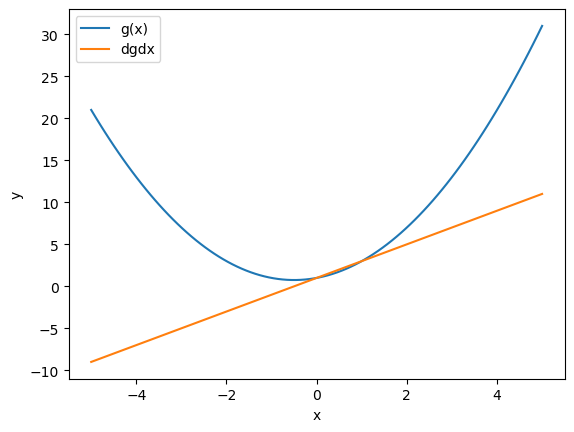

In [124]:
# Plot function and gradient
import matplotlib.pyplot as plt

with torch.no_grad():
    plt.plot(x, g(x), label="g(x)")
    plt.plot(x, dgdx, label="dgdx")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()


## Task 4 - Gradients
Given the vectorfield $f: \mathcal{R}^2 \rightarrow \mathcal{R}$ defined as 

$$
f(\mathbf{x}) = (\mathbf{x} - \tilde{\mathbf{x}}) \cdot \mathbf{Q} \cdot (\mathbf{x} - \tilde{\mathbf{x}})
$$
with 
$$
\mathbf{Q} = 
\begin{pmatrix}
    2 & 1 \\
    1 & 1 
\end{pmatrix} 
\quad 
\text{and}
\quad
\tilde{\mathbf{x}} = 
\begin{pmatrix}
    -1\\
    1 
\end{pmatrix}
$$
compute the gradient analytically.

> The function can be rewritten to 
> $$
>   f(x_1, x_2) = 2(x_1+1)^2 + 2(x_1+1)(x_2-1) + (x_2-1)^2.
> $$
> Then, we can compute 
> $$
>   \frac{\partial f}{\partial x_1} = 4 (x_1+1) + 2(x_2-1)
> $$
> and
> $$
>   \frac{\partial f}{\partial x_2} = 2(x_1+1) + 2(x_2-1)
> $$
> Finally, the gradient is 
> $$
> \nabla f = 
> \begin{pmatrix}
>   \frac{\partial f}{\partial x_1} \\
>   \frac{\partial f}{\partial x_2} \\
> \end{pmatrix}= 
> \begin{pmatrix}
>   4 x_1 + 2 x_2 + 2 \\
>   2x_1 + 2 x_2 \\
> \end{pmatrix}
> $$

Doing these computations by hand takes a while. Therefore we take a look at how to compute gradients using PyTorch. To do so, we start by defining $\mathbf{Q}$, $\tilde{\mathbf{x}}$ and the function $f(\mathbf{x})$. The function $f(\mathbf{x})$ can be implemented in a straight forward way and you should try a straight forward implementation first. 

However, we would like to be able to evaluate the function for many values of $\mathbf{x}$ at the same time. This is equivalent to passing a tensor of the shape $\mathcal{R}^{... \times 2}$ with arbitray dimensions except the last axis. This can be implemented using an ellipsis `...` in `torch.einsum()`.

In [125]:
xt = torch.tensor([-1.0, 1.0])
Q = torch.tensor([[2.0, 1.0], [1, 1.0]])


def f(x):
    dx = x - xt
    return torch.einsum("...i,ij,...j", dx, Q, dx)


If your function is defined correctly, the following cell should plot the function values as a contour plot.

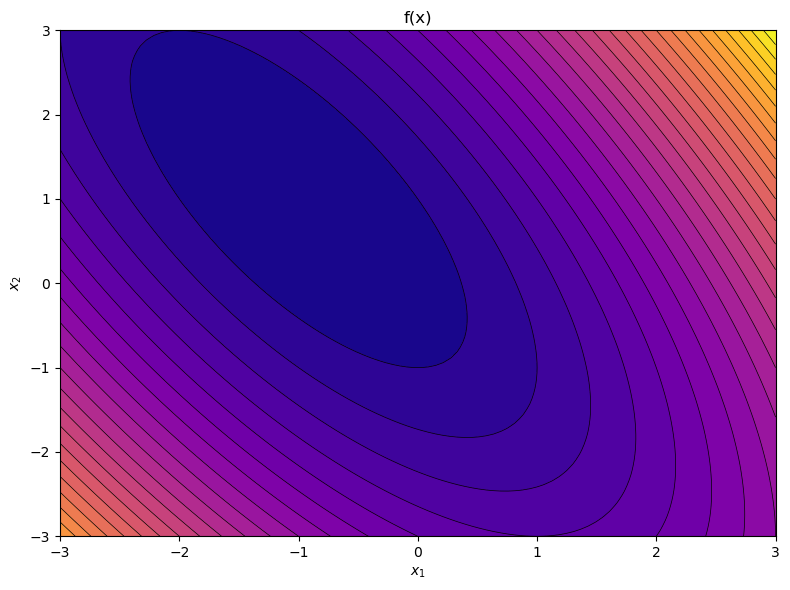

In [126]:
from utils import plot_contours

# Define x
x0 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x1 = torch.linspace(-3, 3, steps=100, requires_grad=True)
x = torch.stack(torch.meshgrid(x0, x1, indexing="xy"), dim=2)

plot_contours(x[..., 0], x[..., 1], f(x), title="f(x)")


Note that the `requires_grad=True` argument defines that these specific tensors will be used in gradient computations. They reserve storage for the tensor data as well as the gradients. Now, lets compute the actual gradients with automatic differentiation:

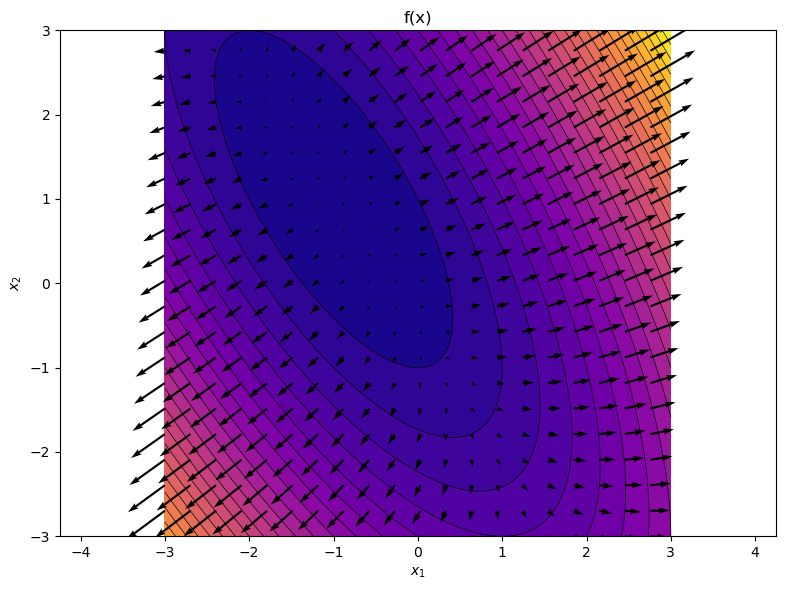

In [127]:
dfdx = torch.autograd.grad(f(x).sum(), x)[0]


# Reproduce basic plot
plot_contours(x[..., 0], x[..., 1], f(x), title="f(x)")

# Plot gradient vectors as arrows on top of previous plot 
with torch.no_grad():
    stride = 5
    plt.quiver(
        x[::stride, ::stride, 0],
        x[::stride, ::stride, 1],
        dfdx[::stride, ::stride, 0],
        dfdx[::stride, ::stride, 1],
    )
    plt.axis("equal")
